In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
Sal_Data = pd.read_csv('Salary_Data.csv')

In [48]:
Sal_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [49]:
Sal_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


# Exploratory Data Analysis

## Missing Datasns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

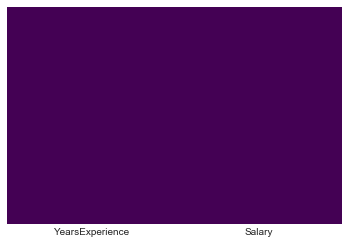

In [50]:
sns.heatmap(Sal_Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is no data missing. 

In [110]:
sns.set_palette("winter")
sns.set_style('whitegrid')

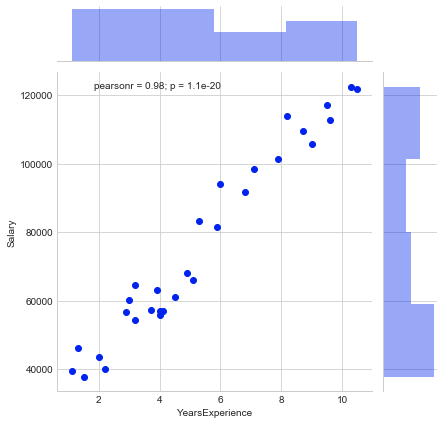

In [111]:
# More experience, more salary.
sns.jointplot(x='YearsExperience',y='Salary',data=Sal_Data)

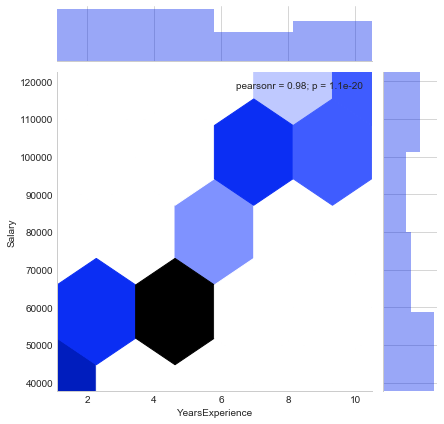

In [112]:
sns.jointplot(x='YearsExperience',y='Salary',kind='hex',data=Sal_Data)

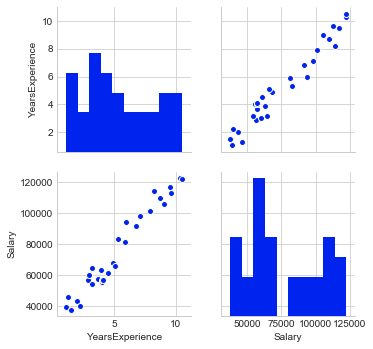

In [113]:
sns.pairplot(Sal_Data)

**A linear model plot of  Years of Experincence vs. Salary. **

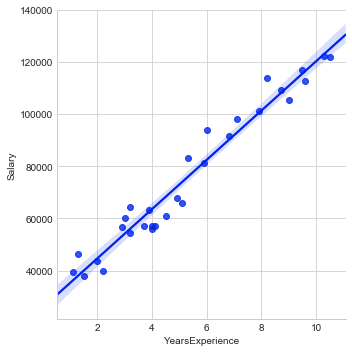

In [114]:
sns.lmplot(x='YearsExperience',y='Salary',data=Sal_Data)

## Training and Testing Data

In [115]:
X = Sal_Data['YearsExperience']

In [116]:
y = Sal_Data['Salary']

## Splitting into Train Test Data

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=0)

## Re shaping the array

In [119]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


C:\Users\Roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\Roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\Users\Roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


## Training the Model

In [120]:
from sklearn.linear_model import LinearRegression

## Creating an instance of a LinearRegression() model named lm

In [121]:
lm = LinearRegression()

## Train/fit lm on the training data

In [122]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
## Print out the coefficients of the model

In [124]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[9345.94244312]]


In [125]:
## Predicting Test Data

In [126]:
predictions = lm.predict( X_test)

In [127]:
## Create a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Y')

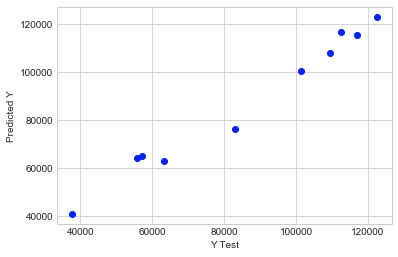

In [128]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [129]:
## Evaluating the Model

In [130]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3426.4269374307123
MSE: 21026037.329511296
RMSE: 4585.4157204675885


In [131]:
## Residuals

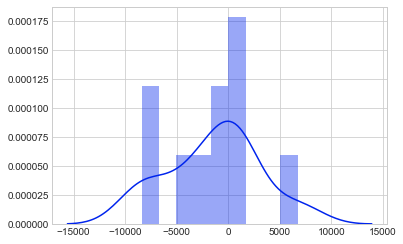

In [132]:
sns.distplot((y_test-predictions),bins=9);

In [133]:
## Coefficient Matrix

In [134]:
coeffecients = pd.DataFrame(lm.coef_)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
0,9345.942443


In [135]:
## Visualizing the testing and training results

Text(0,0.5,'y Train')

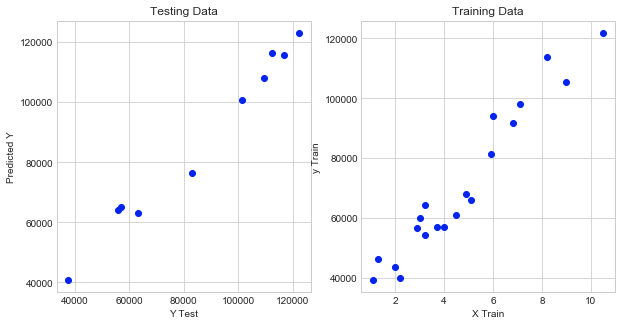

In [136]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Testing Data')
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

plt.subplot(1,2,2)
plt.title('Training Data')
plt.scatter(X_train, y_train)
plt.xlabel('X Train')
plt.ylabel('y Train')